# init

In [ ]:
# init
import numpy as np
from scipy.linalg import lu, inv,det

def tridiagonal(sub,diag,sup,rhs):   #function definition
    """
    Solves a tridiagonal system of equations using Gauss Elimination method
    
    tridiagonal(sub,diag,sup,rhs)
    Solves a tridiagonal system of equations Ax=b to obtain x using Gauss Elimination method
    The coefficient matrix A is defined based on its diagonal, sub-diagonal (below diaginal) 
    and super-diagonal (above diaginal) vectors. 
    All input arguments sub,diag,sup and rhs as must have the same length. 
    The output vector x has the same length as these vectors.
    Input:
        sub: sub-diagonal vector of the matrix. The first element of this vector must be zero
        diag: diagonal vector of the matrix
        sub: super-diagonal vector of the matrix. The last element of this vector must be zero
        rhs: the right-hand side vector
    Output
        x: the unknown vector
    """
    
    n = diag.shape[0] # length of vectors
    # check if vector lengths are equal, if not show an error message
    assert sub.shape[0] == n and  \
           sup.shape[0] == n and  \
           rhs.shape[0] == n      \
           , "all vector lengths must be equal"
    # check if the 1st element of sub ector sf zero, if not show an error message       
    assert sub[0] == 0 , "the first element of sub must be zero"
    # check if the last element of sup ector is zero, if not show an error message       
    assert sup[-1] == 0 , "the last element of sup must be zero"  
    # make local copies of vectors so that the original copies are not over-written
    sub1 = sub.copy()
    diag1 = diag.copy()
    sup1 = sup.copy()
    rhs1 = rhs.copy()
    x = np.zeros(n)   #initiate x vector of size n filled with zeros
    # forward elimination
    for i in range(1,n):
        fac = - sub1[i] / diag1[i-1]  #Factor f for all subsequent rows 
        diag1[i] = diag1[i] + fac * sup1[i-1] #using pivot element to eliminate the sub vector
        rhs1[i] = rhs1[i] + fac * rhs1[i-1]   #using pivot element to modify the rhs vector
    # at this stage a lower triangle matrix results    
    # back substitution
    x[n-1] = rhs1[n-1] / diag1[n-1] #calculate x on the last row
    for i in range(n-2,-1,-1):    #calculate x for row i from n-2 down to 0
        x[i] = (rhs1[i] - sup1[i] * x[i+1]) / diag1[i]     
    return x   #returns x

def gaussElim(A, b, pivot = True):   #function definition
    """
    Solves the system of equations using Gauss Elimination method
    
    gaussElimNaive(A, b, pivot = True)
    Solves the system of equations Ax=b to obtain x using Gauss Elimination method
    Input:
        A: a square matrix 
        b: the right-hand side vector
        pivot: if True partial pivoting is performed, 
               if False no pivoting is performed (default: True)
    Output
        x: the unknown vector
    """
    # check if A is a square matrix, if not show an error message
    assert A.shape[0] == A.shape[1], "A is not a square matrix"
    # check if A, b shapes are consistent, if not show an error message
    assert A.shape[0] == b.shape[0], "A and b shapes do not match"
    n = A.shape[0]  #save the number of rows of the matrix
    # make local copies of A and b so that the original copies are not over-written
    A1 = A.copy()
    b1 = b.copy()
    x = np.zeros(n)   #initiate x vector of size n filled with zeros
    # forward elimination
    for i in range(0, n-1):           #the pivot row i ranging from 0 to n-2
        if pivot :                    #partial pivoting?
            imax = list(abs(A1)[:,i]).index(abs(A1[i:n,:]).max(0)[i]) #finds the row index of the max. absolute value in column i of A1 
                                                                      # abs(A1[i:n,:]).max(0)[i] is the max value
                                                                      # the list().index attributes returns the row index corresponding to 
                                                                      # the max value
            if i != imax :                   #if max occurs at a different location than i
                A1[[i,imax]] = A1[[imax,i]]  #switch the i and imax rows for both A1 and b1
                b1[[i,imax]] = b1[[imax,i]]
        for j in range(i+1, n):      #rows below pivot from i+1 to n-1
            f = - A1[j,i]/A1[i,i]    #A[i,i] is the pivot element. Factor f 
                                     #      is calculated for all subsequent rows
            A1[j,i:n] = A1[j,i:n] + f * A1[i,i:n]  #using pivot element to eliminate/modify 
                                                   #elements below pivot row for all columns
            b1[j] = b1[j] + f * b1[i]              #modify the RHS vector accordingly
    # at this stage a lower triangle matrix results
    # back substitution
    x[n-1] = b1[n-1] / A1[n-1, n-1]  #calculate x on the last row
    for i in range(n-2,-1,-1):       #calculate x for row i from n-2 down to 0
        sum = 0.
        for k in range(i+1, n):
            sum = sum + A1[i, k] * x[k]   # sum of Ax for columns i+1 to n-1
        x[i] =  (b1[i] - sum) / A1[i, i]  #calculate x for row i
    return x  #return x 

# Q1

Consider the following system of equations:
\begin{eqnarray}
0.8x_1-0.4x_{2}&=&41 \\
-0.4x_1+0.8x_{2}-0.4x_{3}&=&25 \\
-0.4x_{2}+0.8x_{3}&=&105 \\
\end{eqnarray}

Use python function `tridiagonal` to solve this system. Use python `gaussElim` function to verify your result.

In [ ]:
# Q1 Answer
a = np.array([0,-0.4, -0.4])
b = np.array([0.8, 0.8, 0.8])
c = np.array([-0.4,-0.4,0])
d = np.array([41,25,105])
x = tridiagonal(a,b,c,d)
a1 = np.array([[.8, -.4, 0], [-.4, .8, -.4], [0, -.4, .8]])
b1 = np.array([41,25,105])
x1 = gaussElim(a1,b1)
print('Using tridiagonal: ', x)
print('Using gaussElim: ',x1)

Using tridiagonal:  [173.125 243.75  253.125]
Using gaussElim:  [173.125 243.75  253.125]


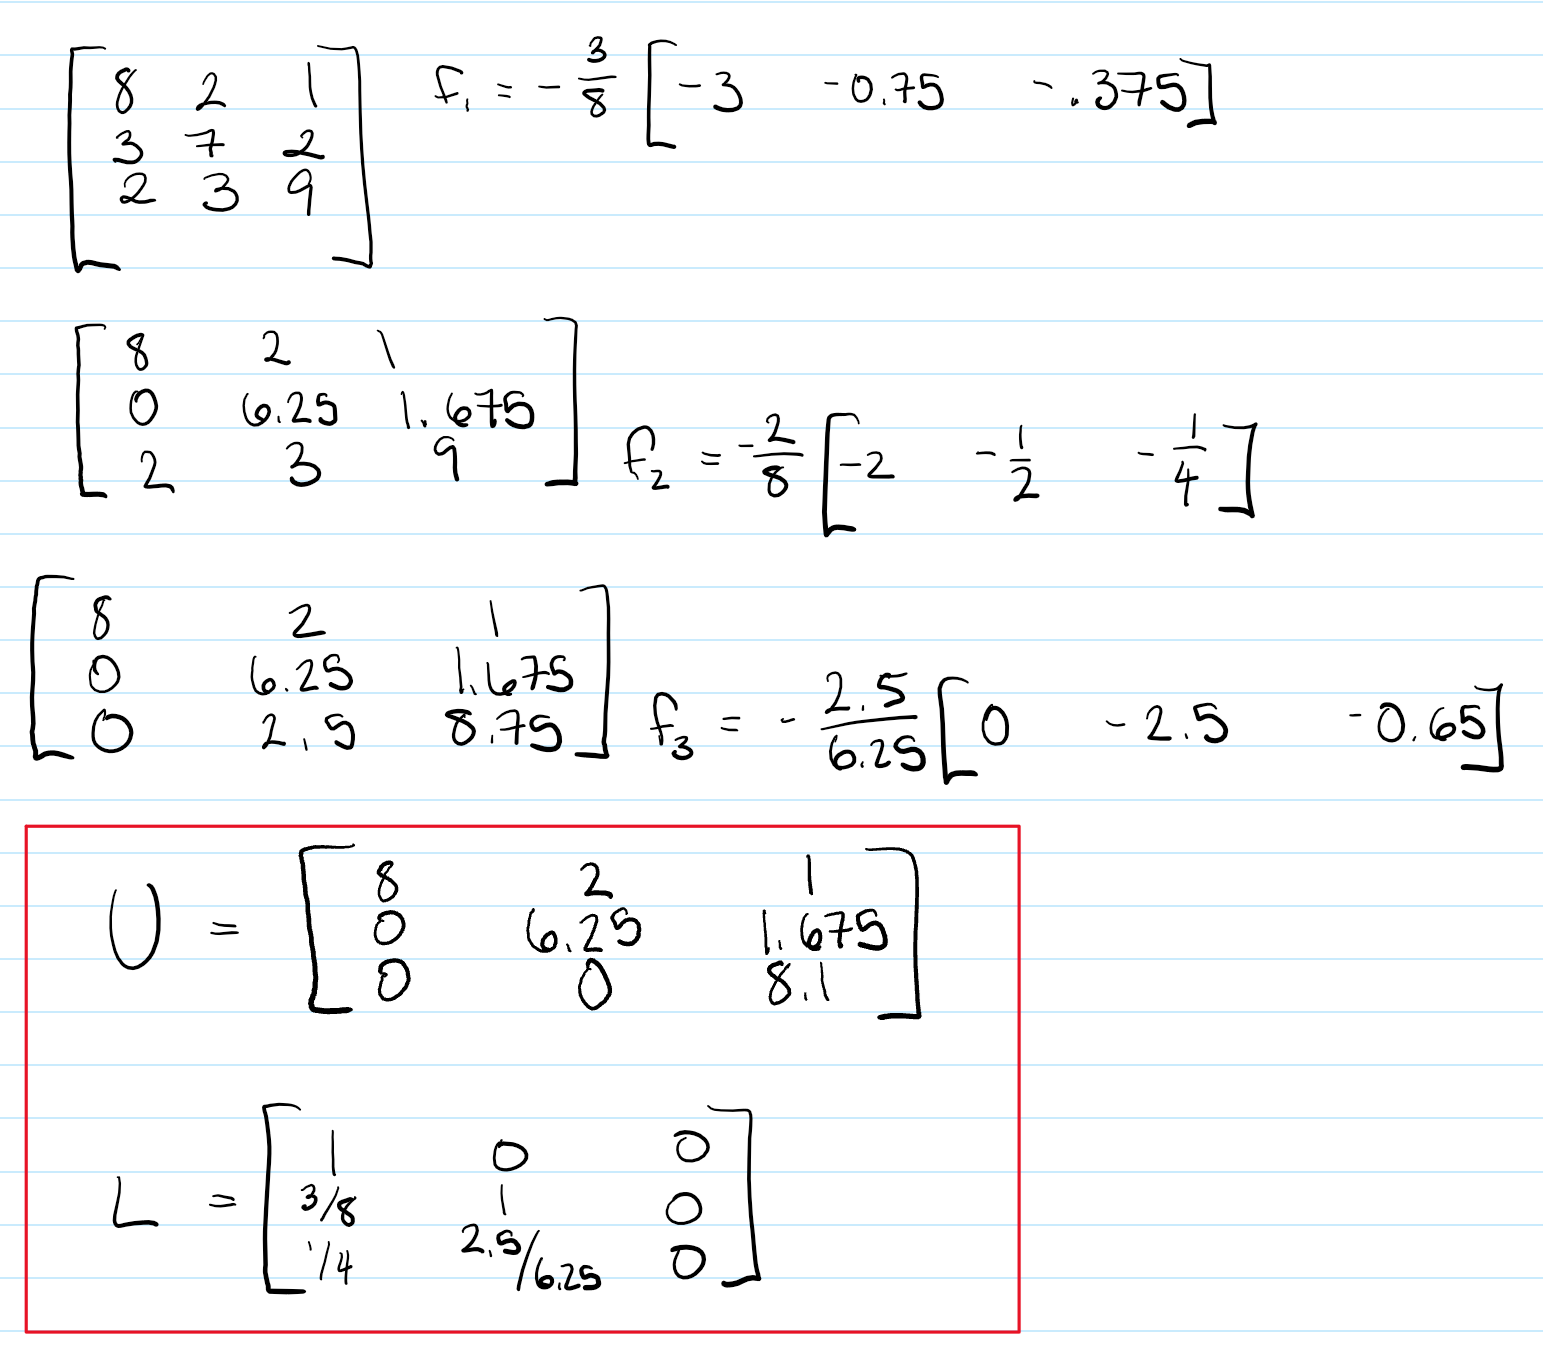

# Q2

Consider the matrix
\begin{equation}[A]=
\begin{bmatrix}
8 & 2 & 1 \\
3 & 7 & 2 \\
2 & 3 & 9 \\
\end{bmatrix}
\end{equation}

1. Use LU factorization by hand to determine $[L]$ and $[U]$ matrices corresponding to the matrix $A$ below and check your results using $[L][U] = [A]$.
2. Starting with function `gaussElim`, develop your own function to perform LU factorization (without pivoting). The template of the function is given below. Use your function to obtain $[L]$ and $[U]$ matrices  and compare your results with those of Part 1. Compare your results with python built-in function `lu`. Verify with python that $[L][U] = [A]$.

In [ ]:
# Q2 Answer
def mylu(A):
  """
  mylu: LU factorization

  L, U = mylu(A): performs LU factorization using Gauss elimination without pivoting
  input:
    A = coefficient matrix (square matrix)
  output:
    L = Lower triangle matrix
    U = Upper triangle matrix
  """  
  # check if A is a square matrix, if not show an error message
  assert A.shape[0] == A.shape[1], "A is not a square matrix"
  n = A.shape[0]  #save the number of rows of the matrix
    # make local copies of A and b so that the original copies are not over-written
  U = A.copy()
  L = np.eye(n)
    # forward elimination
  for i in range(0, n-1):           #the pivot row i ranging from 0 to n-2
     
      for j in range(i+1, n):      #rows below pivot from i+1 to n-1
         f = - U[j,i]/U[i,i]    #A[i,i] is the pivot element. Factor f 
                                     #      is calculated for all subsequent rows
         U[j,i:n] = U[j,i:n] + f * U[i,i:n]  #using pivot element to eliminate/modify 
         L[j,i] = -f+L[j,i]                                    #elements below pivot row for all columns
            
    # at this stage a upper triangle matrix results
    
  
  return L, U

A = np.array([[8,2,1],[3,7,2],[2,3,9]],float)
L , U = mylu(A)
print('from created function lower is:\n',L)
print('Fromt created function upper is:\n',U)

PT,L,U = lu(A)
print('lower matrix is:\n',L)
print('upper matrix is:\n',U) 
print('verified A is:\n',np.dot(L,U))

from created function lower is:
 [[1.    0.    0.   ]
 [0.375 1.    0.   ]
 [0.25  0.4   1.   ]]
Fromt created function upper is:
 [[8.    2.    1.   ]
 [0.    6.25  1.625]
 [0.    0.    8.1  ]]
lower matrix is:
 [[1.    0.    0.   ]
 [0.375 1.    0.   ]
 [0.25  0.4   1.   ]]
upper matrix is:
 [[8.    2.    1.   ]
 [0.    6.25  1.625]
 [0.    0.    8.1  ]]
verified A is:
 [[8. 2. 1.]
 [3. 7. 2.]
 [2. 3. 9.]]


# Q3

Starting with the function `gaussElim`, develop your own function to calculate the determinant of a square matrix (with pivoting). The template is given below. Use your function to obtain the determinant of the matrix below. Compare your result with that of python built-in function `det`.
\begin{equation}[A]=
\begin{bmatrix}
3 & 7 & 2 \\
2 & 13 & 9 \\
8 & 2 & 1 \\
\end{bmatrix}
\end{equation}

In [ ]:
# Q3 Answer
def mydet(A):   #function definition
    """
    mydet: determinant of a matrix

    d = mydet(A): calculates the determinant of a matrix.
    input:
      A = a square matrix
    output:
      d = determinant value
    """
    pivot = True
     # check if A is a square matrix, if not show an error message
    assert A.shape[0] == A.shape[1], "A is not a square matrix"
    n = A.shape[0]  #save the number of rows of the matrix
    # make local copies of A and b so that the original copies are not over-written
    A1 = A.copy()
    # forward elimination
    p=0
    for i in range(0, n-1):           #the pivot row i ranging from 0 to n-2
        if pivot :                    #partial pivoting?
            imax = list(abs(A1)[:,i]).index(abs(A1[i:n,:]).max(0)[i]) #finds the row index of the max. absolute value in column i of A1 
                                                                      # abs(A1[i:n,:]).max(0)[i] is the max value
                                                                      # the list().index attributes returns the row index corresponding to 
                                                                      # the max value
            if i != imax :                   #if max occurs at a different location than i
                A1[[i,imax]] = A1[[imax,i]]  #switch the i and imax rows for A1 
                p=p+1
              
        for j in range(i+1, n):      #rows below pivot from i+1 to n-1
            f = - A1[j,i]/A1[i,i]    #A[i,i] is the pivot element. Factor f 
                                     #      is calculated for all subsequent rows
            A1[j,i:n] = A1[j,i:n] + f * A1[i,i:n]  #using pivot element to eliminate/modify 
                                                   #elements below pivot row for all columns
           
    # at this stage a lower triangle matrix results
            d=1
            for i in range(0,n):  
              d = d*A1[i,i]*(-1)**p
    
  
    return d

A = np.array([[3,7,2],[2,13,9],[8,2,1]],float)    
d = mydet(A)
print(d)
print('using my function det :\n ', d)
dt = np.linalg.det(A)
print('using python det:', dt)

490.00000000000006
using my function det :
  490.00000000000006
using python det: 275.0000000000001


# Q4

Consider the system of equations $[A]\{x\}=\{b\}$ described as
\begin{eqnarray}
10x_1+2x_{2}-x_{3}&=&27 \\
-3x_1-6x_{2}+2x_{3}&=&-61.5 \\
x_1+x_{2}+5x_{3}&=&-21.5 \\
\end{eqnarray}

Develop a python function with template given below to calculate the inverse of a square matrix using column-by-column method by LU factorization. Use this function to determine the inverse of the coefficient matrix $[A]$. Use python built-in function `inv` to check your result. Verify that $[A][A]^{-1}=[I]$.

In [ ]:
# Q4 Answer
def myinv(A):
  """
   myinv: inverse of a square matrix

   Ainv = myinv(A): calculates the inverse of a square matrix
                   using the column-by-column method by LU factorization
   input:
     A = a square matrix
   output:
     Ainv = the inverse of A
  """
  # check if A is a square matrix, if not show an error message
  assert A.shape[0] == A.shape[1], "A is not a square matrix"
  n = A.shape[0]  #save the number of rows of the matrix
    # make local copies of A and b so that the original copies are not over-written
  U = A.copy()
  L = np.eye(n)
  Ainv = np.zeros(A.shape)
  b = np.eye(n)
  c = np.zeros(n)
    # forward elimination
  for i in range(0, n-1):           #the pivot row i ranging from 0 to n-2
     
      for j in range(i+1, n):      #rows below pivot from i+1 to n-1
         f = - U[j,i]/U[i,i]    #A[i,i] is the pivot element. Factor f 
                                     #      is calculated for all subsequent rows
         U[j,i:n] = U[j,i:n] + f * U[i,i:n]  #using pivot element to eliminate/modify 
         L[j,i] = -f+L[j,i]                                    #elements below pivot row for all columns
            
    # at this stage a upper triangle matrix results
      for i in range(0,n):
         c = b[:,i]
         di = np.linalg.solve(L,c)
         xi = np.linalg.solve(U,di)
         Ainv[:,i]=xi
    
  return Ainv

A = np.array([[10,2,-1],[-3,-6,2],[1,1,5]],float)
b = np.array([27,-61.5,-21.5],float)
Ainv = myinv(A) 
print(Ainv)

Acorrect = np.linalg.inv(A)
print(Acorrect)

[[ 0.11072664  0.03806228  0.00692042]
 [-0.05882353 -0.17647059  0.05882353]
 [-0.01038062  0.02768166  0.18685121]]
[[ 0.11072664  0.03806228  0.00692042]
 [-0.05882353 -0.17647059  0.05882353]
 [-0.01038062  0.02768166  0.18685121]]
